In [2]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import json
import numpy as np
%matplotlib inline

In [16]:
def read_csv(fname):
    #f = lambda x : json.loads(x.replace("'","\""))
    #df = pd.read_csv(fname, converters={'sensor_type': f}, index_col=0)
    df = pd.read_csv(fname, index_col=0)
    return df

In [7]:
def save_graph(plot, fname='saved.png'):
    fig = plot.get_figure()
    fig.savefig(fname)

In [60]:
keys = {'all': ['ma_window', 'sensor_type', 'n_record', 'n_train', 'ms_interval'],
        'kNN': ['n_neighbors', 'algorithm'],
        'k-means': ['n_clusters', 'max_iter'],
        'NN': ['num_of_hidden_nodes', 'num_of_training_epochs', 'size_of_mini_batch', 'learning_rate'],
       }

def df_values(_df):
    print('--- common')
    for c in keys['all']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[c].unique()))

    print('--- kNN')
    for c in keys['kNN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='kNN'][c].unique()))
    
    print('--- k-means')
    for c in keys['k-means']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='k-means'][c].unique()))
    
    print('--- NN')
    for c in keys['NN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='NN'][c].unique()))

In [63]:
#csv_file = 'test_record-20170425.csv'
csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv.bak_20170428_0916'
df = read_csv(csv_file)

#df.sort_values(by=['auc'], ascending=False).head(100)
df[300:320]

,algorithm,learning_rate,ma_window,max_iter,ms_interval,n_clusters,n_neighbors,n_record,n_train,num_of_hidden_nodes,num_of_training_epochs,sensor_type,size_of_mini_batch,size_of_test_batch,type,auc
300,NaN,NaN,1,3.0,60,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b"", [""attitude.roll"", ""attitu...",NaN,NaN,k-means,0.298356
301,NaN,NaN,1,3.0,60,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b"", [""rotationRate.x"", ""rotat...",NaN,NaN,k-means,0.166968
302,NaN,NaN,1,3.0,60,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b"", [""gravity.x"", ""gravity.y""...",NaN,NaN,k-means,0.487639
303,NaN,NaN,1,3.0,60,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b"", [""userAcceleration.x"", ""u...",NaN,NaN,k-means,0.045324
304,NaN,NaN,1,3.0,100,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b""]",NaN,NaN,k-means,0.338056
305,NaN,NaN,1,3.0,100,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b"", [""acceleration.x"", ""accel...",NaN,NaN,k-means,0.341551
306,NaN,NaN,1,3.0,100,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b"", [""gyro.rotationRate.x"", ""...",NaN,NaN,k-means,0.175463
307,NaN,NaN,1,3.0,100,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b"", [""magneticField.x"", ""magn...",NaN,NaN,k-means,0.233958
308,NaN,NaN,1,3.0,100,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b"", [""attitude.roll"", ""attitu...",NaN,NaN,k-means,0.504074
309,NaN,NaN,1,3.0,100,5.0,NaN,1,100,NaN,NaN,"[""rssi.a"", ""rssi.b"", [""rotationRate.x"", ""rotat...",NaN,NaN,k-means,0.185810


In [82]:
def show_graph(df_list, columns, x_title, y_title):
    x_title = 'n_train'
    y_title = 'auc'
    """    
    df1 = df[df['type'] == 'k-means']
    df2 = df[df['type'] == 'kNN']
    df3 = df[df['type'] == 'rssi_based']
    """
    x = df_list[0][x_title].values
    y = [df[y_title].values for df in df_list]
    
    print(x)
    print(y)
    v_max, v_min = np.max(y), np.min(y)
    y.append(x)
    
    v_range = v_max - v_min

    #df = pd.DataFrame(np.array([x, y1, y2, y3]).T, columns=['n_train', 'k-means', 'kNN', 'rssi_based'])
    df = pd.DataFrame(np.array(y).T, columns=columns)
    display(df)
    #df.plot.bar(x='n_train', y=['kNN'], ylim=[.0, 1.2])
    df.plot.bar(x='n_train', y=['kNN'], ylim=[v_min - v_range*0.1, v_max + v_range*0.2])

--- common
ma_window                               [1]
sensor_type                             [ '["rssi.a", "rssi.b", ["gyro.rotationRate.x", "gyro.rotationRate.y", "gyro.rotationRate.z"]]']
n_record                                [1]
n_train                                 [  1   5  10  20 100]
ms_interval                             [20]
--- kNN
n_neighbors                             [ 1.  3.  5.  7.  9.]
algorithm                               ['ball_tree']
--- k-means
n_clusters                              [ 1.  3.  5.  7.  9.]
max_iter                                [ 3.]
--- NN
num_of_hidden_nodes                     [  4.   8.  16.  32.]
num_of_training_epochs                  [ 100.]
size_of_mini_batch                      [ 10.]
learning_rate                           [ 0.02]
[  5  10  20 100]
[array([ 0.89671296,  0.90185185,  0.90944444,  0.90532407])]


,kNN,n_train
0,0.896713,5.0
1,0.901852,10.0
2,0.909444,20.0
3,0.905324,100.0


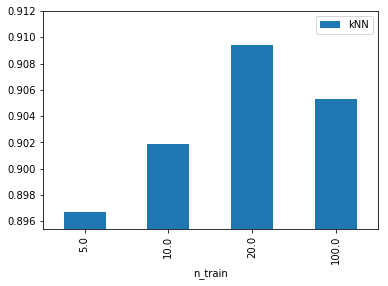

In [83]:
#csv_file = 'test_record-20170425.csv'
csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv.bak_20170428_0916'
df = read_csv(csv_file)

_d = df[
    (df['n_record'] == 1) & 
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: 'gyro.rotationRate' in x))
]
df_values(_d)

_d_knn = _d[(_d['type']=='kNN') & (_d['n_neighbors'] == 5)]


show_graph([_d_knn], ['kNN', 'n_train'], 'n_train', 'auc')


In [80]:
a = np.array([[1,2,3],[4,5,6]])
np.min(a)

1